Author: Bram van Duinen

Date: 15 nov 2023

Content: Trying to load in some demand data, and detecting events with high residual load. Calculating co-occurences of max residual load per run in-between countries

In [4]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import colorcet as cc
import seaborn as sns
import itertools
from tqdm.notebook import tqdm

In [5]:
from mappings import df_countries

In [6]:
daily = '/net/pc200256/nobackup/users/most/LENTIS/present/day/'
energy = '/net/pc200256/nobackup/users/most/output/LENTIS_PD_02/agg_production/per_country/'

In [7]:
def add_filename(ds):
    # Extract the filename from the 'source' attribute, which is automatically set by open_mfdataset
    filename = os.path.basename(ds.encoding['source'])
    
    # Extract the characters that match the '???' part of the filename
    identifier = filename.split('_')[0]
    
    # Add the identifier as a new coordinate to the dataset
    ds = ds.assign_coords(country_name=identifier)
    
    return ds

data_prod = xr.open_mfdataset(energy + '???' + '_LENTIS_PD_02_v4.nc', combine='nested', concat_dim='country', preprocess=add_filename)

num_countries = np.shape(data_prod.residual)[0]

In [8]:
countries = data_prod.country_name.values

In [9]:
data_prod

<xarray.Dataset>
Dimensions:        (time: 3591, country: 24, runs: 160)
Coordinates:
  * time           (time) datetime64[ns] 2000-02-01T12:00:00 ... 2009-11-30T1...
  * runs           (runs) object 'h010' 'h011' 'h012' ... 'h167' 'h168' 'h169'
  * country        (country) float64 1.0 5.0 3.0 6.0 8.0 ... 34.0 37.0 36.0 35.0
    country_name   (country) <U3 'AUT' 'BGR' 'BIH' 'CHE' ... 'SVK' 'SVN' 'SWE'
Data variables: (12/15)
    pv_util        (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    pv_roof        (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    wind_offshore  (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    wind_onshore   (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    ror            (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    temp           (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    ...             ...
    Ein            (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    inflow         (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    reservoir      (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    conventional   (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    total_RE       (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
    residual       (country, runs, time) float64 dask.array<chunksize=(1, 160, 3591), meta=np.ndarray>
Attributes:
    author:   Lieke van der Most - RUG/KNMI
    project:  ICEVEPS
    area:     EU
    source:   LENTIS 1600 years (parent 01-16 and seed 0-9)
    history:  Computed 14-Nov-2023 (09:24)
    climate:  pd

In [75]:
quantile_val = 0.9997260274
quant = data_prod.residual.quantile(quantile_val, dim = ['time', 'runs'], keep_attrs = True).compute()
events = data_prod.where(data_prod.residual >= quant)

In [99]:
sorted_indices = data_prod.residual.compute().argsort()

In [100]:
sorted_data_prod = data_prod.residual.isel(time=sorted_indices)

IndexError: dimension coordinate 'time' conflicts between indexed and indexing objects:
<xarray.DataArray 'time' (country: 24, runs: 160, time: 3591)>
array([[['2005-07-15T12:00:00.000000000',
         '2004-04-12T12:00:00.000000000',
         '2004-04-09T12:00:00.000000000', ...,
         '2002-01-31T12:00:00.000000000',
         '2002-01-23T12:00:00.000000000',
         '2002-01-28T12:00:00.000000000'],
        ['2009-04-28T12:00:00.000000000',
         '2002-06-11T12:00:00.000000000',
         '2007-05-30T12:00:00.000000000', ...,
         '2008-02-04T12:00:00.000000000',
         '2008-02-06T12:00:00.000000000',
         '2008-02-08T12:00:00.000000000'],
        ['2000-05-11T12:00:00.000000000',
         '2001-05-21T12:00:00.000000000',
         '2007-04-25T12:00:00.000000000', ...,
         '2007-01-01T12:00:00.000000000',
         '2006-12-27T12:00:00.000000000',
         '2006-12-29T12:00:00.000000000'],
        ...,
        ['2006-05-29T12:00:00.000000000',
...
         '2008-12-09T12:00:00.000000000'],
        ...,
        ['2001-06-03T12:00:00.000000000',
         '2006-06-25T12:00:00.000000000',
         '2006-07-09T12:00:00.000000000', ...,
         '2005-04-16T12:00:00.000000000',
         '2005-04-18T12:00:00.000000000',
         '2005-04-23T12:00:00.000000000'],
        ['2009-05-24T12:00:00.000000000',
         '2009-05-23T12:00:00.000000000',
         '2009-05-30T12:00:00.000000000', ...,
         '2003-03-17T12:00:00.000000000',
         '2003-03-28T12:00:00.000000000',
         '2003-03-27T12:00:00.000000000'],
        ['2006-06-04T12:00:00.000000000',
         '2006-06-03T12:00:00.000000000',
         '2006-06-10T12:00:00.000000000', ...,
         '2005-03-24T12:00:00.000000000',
         '2005-03-22T12:00:00.000000000',
         '2005-03-25T12:00:00.000000000']]], dtype='datetime64[ns]')
Coordinates:
  * time          (country, runs, time) datetime64[ns] 2005-07-15T12:00:00 .....
  * runs          (runs) object 'h010' 'h011' 'h012' ... 'h167' 'h168' 'h169'
  * country       (country) float64 1.0 5.0 3.0 6.0 8.0 ... 34.0 37.0 36.0 35.0
    country_name  (country) <U3 'AUT' 'BGR' 'BIH' 'CHE' ... 'SVK' 'SVN' 'SWE'
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T
vs.
<xarray.IndexVariable 'time' (time: 3591)>
array(['2000-02-01T12:00:00.000000000', '2000-02-02T12:00:00.000000000',
       '2000-02-03T12:00:00.000000000', ..., '2009-11-28T12:00:00.000000000',
       '2009-11-29T12:00:00.000000000', '2009-11-30T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

In [85]:
all_events.event.values

array([(Timestamp('2000-02-01 12:00:00'), 'h010'),
       (Timestamp('2000-02-01 12:00:00'), 'h011'),
       (Timestamp('2000-02-01 12:00:00'), 'h012'), ...,
       (Timestamp('2009-08-14 12:00:00'), 'h167'),
       (Timestamp('2009-08-14 12:00:00'), 'h168'),
       (Timestamp('2009-08-14 12:00:00'), 'h169')], dtype=object)

In [80]:
import pandas as pd

# Calculate the original number of events
original_num_events = events.count().compute()

# Identify all the events and their times
mask = (data_prod.residual >= quant).compute()  # Compute the mask before using it for indexing
all_events = data_prod.residual.where(mask, drop=True).stack(event=('time', 'runs'))

# Sort the events by the residual value in descending order
sorted_events = all_events.sortby(-all_events)

# Initialize an empty list for the final events
final_events = []

# Iterate over the sorted events
for coord in sorted_events.coords['event'].values:
    time, run = coord
    # If the final events list is empty, add the current event
    if not final_events:
        final_events.append((time, run))
    else:
        # Calculate the difference in days between the current event and the last added event
        time_diff = pd.Timedelta(time - final_events[-1][0]).days
        # If the difference is at least 7 days, add the current event to the final events list
        if time_diff >= 7:
            final_events.append((time, run))
    # Stop when the final events list has the same length as the original number of events
    if len(final_events) == original_num_events:
        break

# Convert the final events list to a DataArray
final_events_da = xr.DataArray(final_events, dims=['event'], coords={'event': final_events})

ValueError: Input DataArray is not 1-D.

In [76]:
# Create a boolean mask where the 'residual' is not NaN
mask_not_nan = events.residual[3].notnull()

# Sum over the mask to count the number of non-NaN values
num_not_nan = mask_not_nan.sum().compute()

print(f"The number of 1-in-10yr events is {num_not_nan.values}.")

The number of 1-in-10yr events is 158.


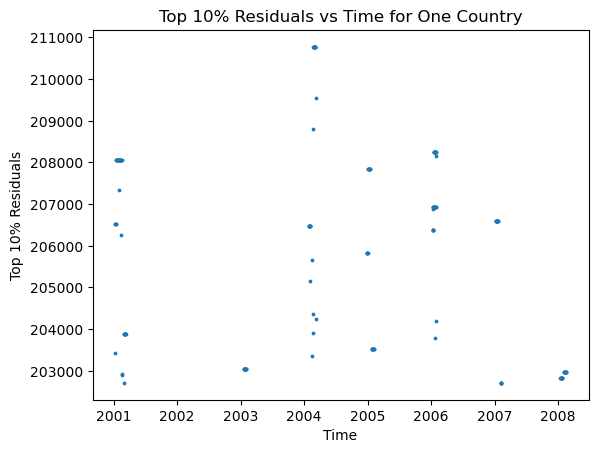

In [77]:
# Get the number of runs
num_runs = events.dims['runs']

# Create a scatter plot for each run
for i in range(num_runs):
    plt.scatter(events.time, events.residual[3,i,:], color='C0', s = 3)

# Set the labels and title
plt.xlabel('Time')
plt.ylabel('Top 10% Residuals')
plt.title('Top 10% Residuals vs Time for One Country')

# Show the plot
plt.show()

In [44]:
max_residuals = data_prod.residual.max(dim='time')
times_of_max_residuals = data_prod.residual.time.isel(time=data_prod.residual.argmax(dim='time').compute())

# Combine into a single Dataset
result = xr.Dataset({'max_residual': max_residuals, 'time_of_max_residual': times_of_max_residuals})

/tmp/ipykernel_3580076/347621810.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cc.cm.glasbey_hv)


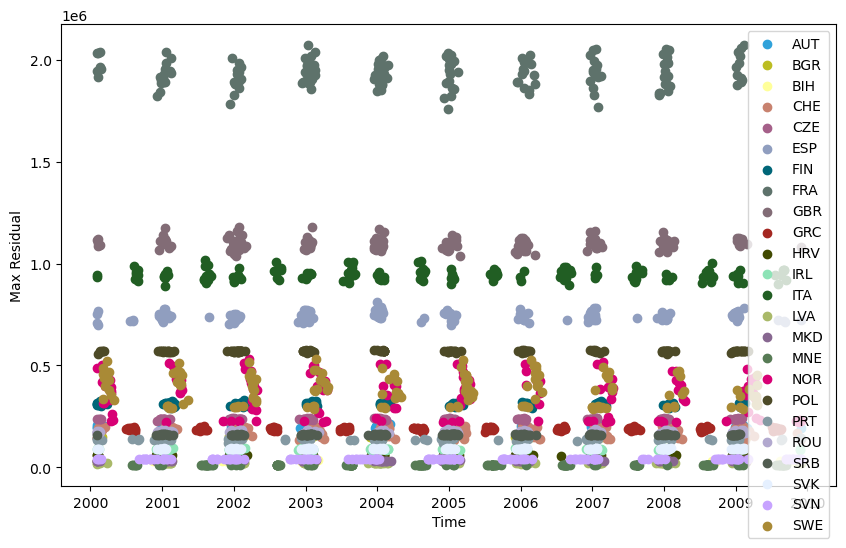

In [11]:
# Get a colormap
cmap = plt.cm.get_cmap(cc.cm.glasbey_hv)

# Create a colormap with 30 discrete points
discrete_cmap = ListedColormap(cmap(np.linspace(0, 1, num_countries)))

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i in range(num_countries):
    plt.scatter(times_of_max_residuals[i], max_residuals[i], color=discrete_cmap(i), label=countries[i])
plt.legend()

# Add labels
plt.xlabel('Time')
plt.ylabel('Max Residual')

plt.show()

Text(0, 0.5, 'Number of events')

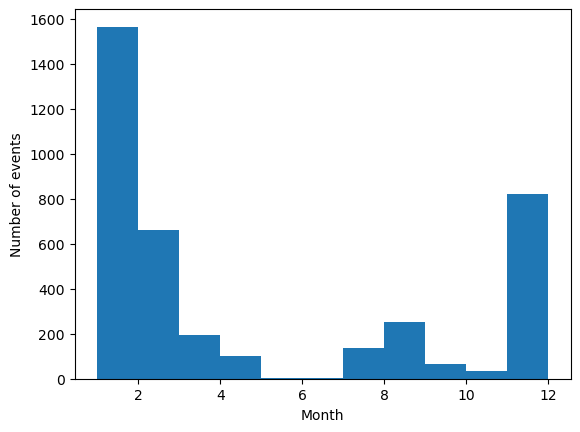

In [25]:
months = times_of_max_residuals.dt.month.values.flatten()
#make a histogram of months
plt.hist(months, bins=11)
plt.xlabel('Month')
plt.ylabel('Number of events')

In [13]:
# Initialize a DataArray to store the co-occurrences
co_occurrences = xr.DataArray(
    np.zeros((len(times_of_max_residuals.runs), len(times_of_max_residuals.country), len(times_of_max_residuals.country)), dtype=bool),
    coords={'runs': times_of_max_residuals.runs, 'country_1': times_of_max_residuals.country.values, 'country_2': times_of_max_residuals.country.values},
    dims=['runs', 'country_1', 'country_2']
)

# Iterate over the 'runs' dimension
for run in tqdm(times_of_max_residuals.runs):
    # Compare the times of max residuals for each pair of countries
    for country_1, country_2 in itertools.product(times_of_max_residuals.country, repeat=2):
        difference = times_of_max_residuals.sel(runs=run, country=country_1) - times_of_max_residuals.sel(runs=run, country=country_2)
        co_occurrences.loc[dict(runs=run, country_1=country_1.values, country_2=country_2.values)] = abs(difference) <= np.timedelta64(7, 'D')

  0%|          | 0/160 [00:00<?, ?it/s]

In [15]:
# Sum up the co-occurrences over all runs
co_occurrences_sum = co_occurrences.sum(dim='runs').astype(float)
np.fill_diagonal(co_occurrences_sum.values, np.nan)

# Convert the DataArray to a DataFrame
co_occurrences_df = co_occurrences_sum.to_dataframe(name='co_occurrences').reset_index()

# Create a pivot table
pivot_table = co_occurrences_df.pivot(index='country_1', columns='country_2', values='co_occurrences')

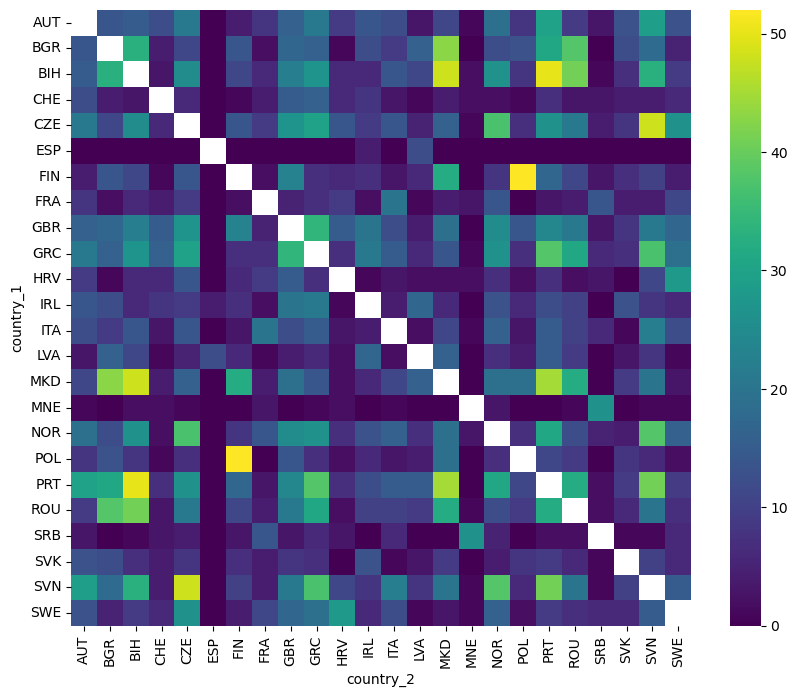

In [17]:
plt.figure(figsize=(10, 8))

sns.heatmap(pivot_table, cmap='viridis')
# Now make the xticks the country identifiers from country_name
plt.xticks(np.arange(num_countries) + 0.5, countries, rotation=90)
plt.yticks(np.arange(num_countries) + 0.5, countries, rotation=0)
plt.show()